## Time Series EDA - Australian Drug Sales

This is an example EDA for Time-Series data. This notebook is inspired by [this article](https://www.machinelearningplus.com/time-series/time-series-analysis-python) on time series analysis.  
The goal of this notebook is to learn more on how to process TS data and on how to analyze it.

Little overview of this EDA / notebook:
* Data Engineering / Bringing data in the right format
* Plot data overall
* Look at Trend (yearly) and Seasonality (monthly)
* Additive / Multiplicative Decomposition using statsmodels: What explains our TS better?
* Outlook / Knowledge Repository for the next steps

In [102]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from dateutil.parser import parse
#Later used
from statsmodels.tsa.seasonal import seasonal_decompose

In [122]:
#Import data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
                   , parse_dates = ['date'] # reads date as date string
                  #, index_col = 'date' #makes the date as index, we add that later
                  ) 

In [127]:
data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [128]:
data.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


In [129]:
# Set the date of the values as index
data.set_index('date', inplace = True)

In [131]:
# Resample values to yearly view
data['value'].resample('Y').mean()

date
1991-12-31     3.573824
1992-12-31     3.807246
1993-12-31     4.627724
1994-12-31     5.068007
1995-12-31     5.610550
1996-12-31     6.449827
1997-12-31     7.094306
1998-12-31     7.775885
1999-12-31     8.829920
2000-12-31    10.208049
2001-12-31    11.372287
2002-12-31    12.422178
2003-12-31    13.038688
2004-12-31    15.316578
2005-12-31    16.637966
2006-12-31    18.362890
2007-12-31    22.143247
2008-12-31    22.506085
Freq: A-DEC, Name: value, dtype: float64

In [22]:
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [133]:
# Create a new feature based on the date
data['weekday'] = data.index.day_name()
data.head()

,value,weekday
date,,
1991-07-01,3.526591,Monday
1991-08-01,3.180891,Thursday
1991-09-01,3.252221,Sunday
1991-10-01,3.611003,Tuesday
1991-11-01,3.565869,Friday


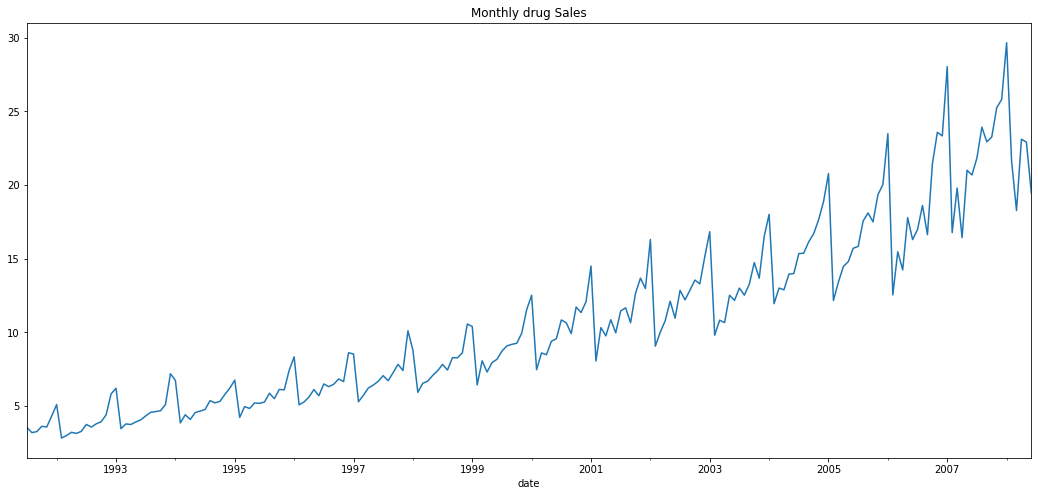

In [99]:
# Plot the data
data['value'].plot(title = 'Monthly drug Sales'
          , figsize = (18, 8)
          , legend = False)

# clear trend and seasonality visible.
# In a next step, those should be looked at separately

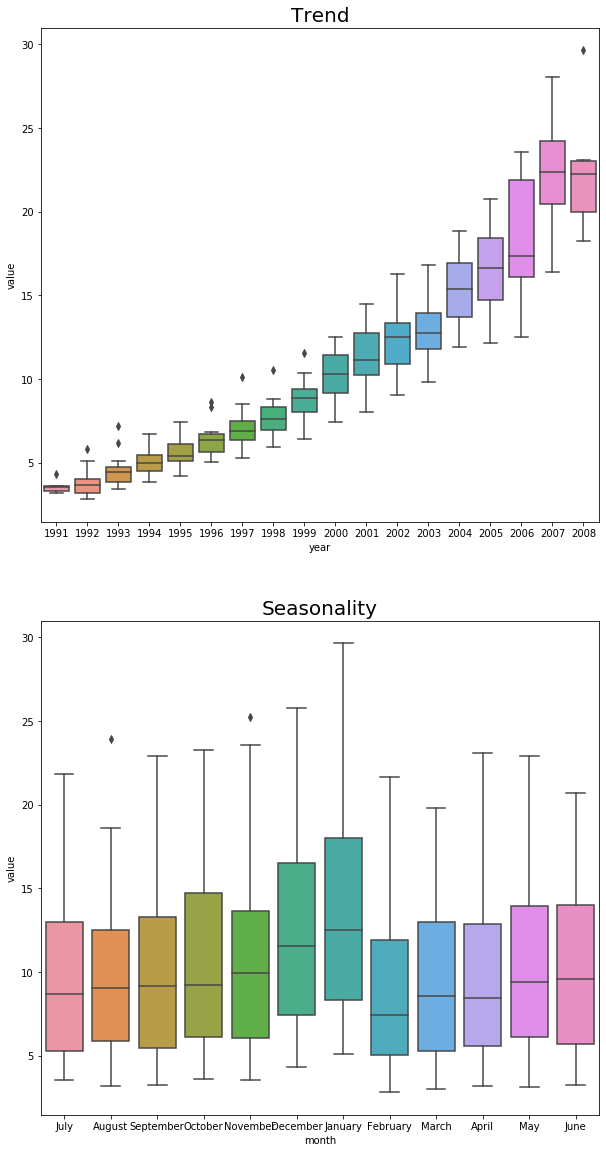

In [98]:
# Have a look at trend and seasonality
data['year'] = data.index.year
data['month'] = data.index.month_name()
years = data['year'].unique()

fig, axes = plt.subplots(2, 1, figsize = (10, 20))
sns.boxplot('year', 'value', data = data, ax = axes[0]) \
    .set_title('Trend', fontsize = 20)

sns.boxplot('month', 'value', data = data, ax = axes[1]) \
    .set_title('Seasonality', fontsize = 20)

plt.show()

#### Decompose the time series in its components
A time series may be additive or multiplicative:  
Value = Base Level +/* Trend +/* Seasonality +/* Error  
The statsmodel lets us decompose the time series to its parts

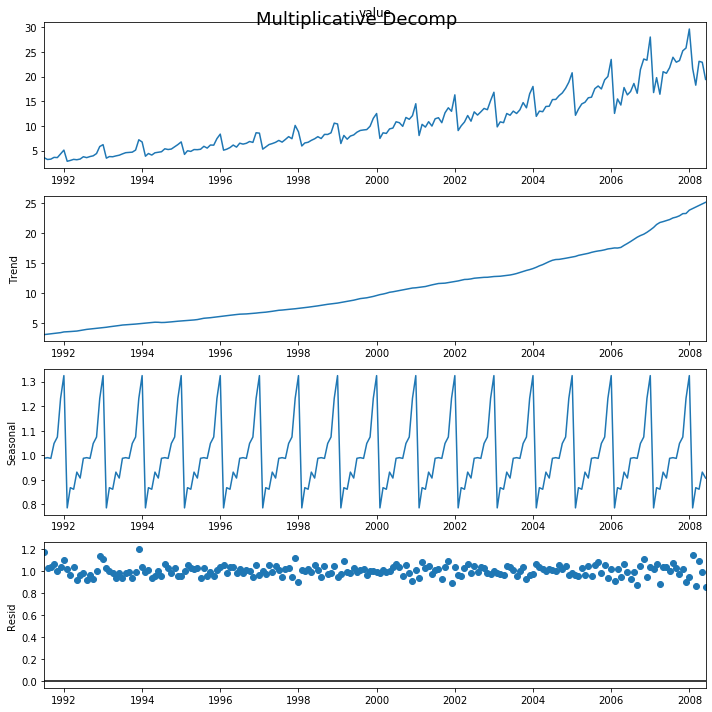

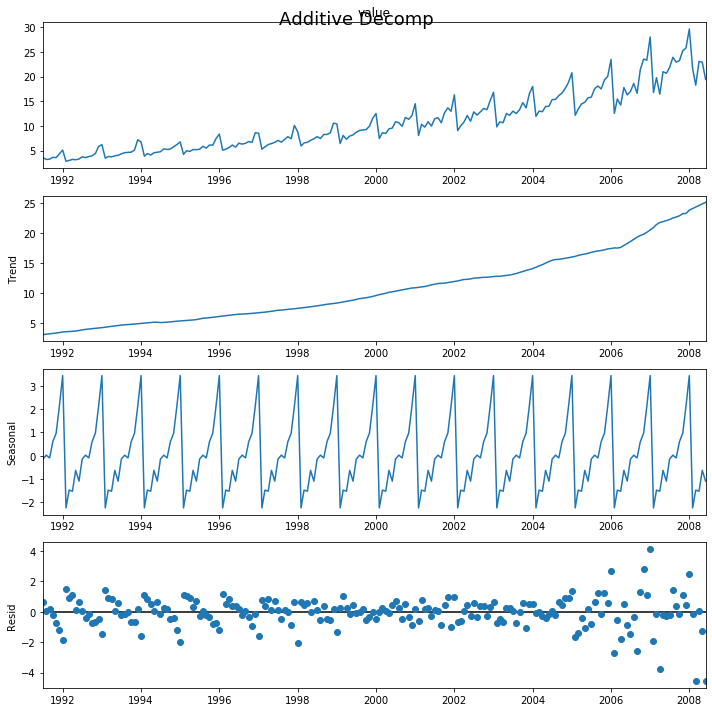

In [120]:
# Multiplicative decomposition by statsmodels
res_mul = seasonal_decompose(data['value'], model = 'multiplicative', extrapolate_trend = 'freq')
res_add = seasonal_decompose(data['value'], model = 'additive', extrapolate_trend = 'freq')

plt.rcParams['figure.figsize'] = (10, 10)
res_mul.plot().suptitle('Multiplicative Decomp', fontsize = 18)
res_add.plot().suptitle('Additive Decomp', fontsize = 18)
plt.show()

Multiplicative Decomp shows Residuals that look very random - which is good.  
Additive shows Residuals that still contain some patern - so mult decomp should be preferred.  
Next step would be to make the Time Series stationary - meaning that mean, variance, autocorrelation and other stay constant over time (are not a function of time).

How to fill NAs in time series?  
Multiple interpolation methods exist: Linear, Quadratic, Mean, ...
  
How to differentiate cyclic and seasonal patterns?  
If patterns are not calender based, then they are cyclic. Cyclic effects are typically influenced by the business and other socio-economic factors.
  
What are some of the next steps?  
1) Autocorrelation: If a series is heavily autocorrelated, means that the lag has a high prediction power. Lags: previous values of the series  
2) Lag Plots: like scatterplots, used for checking autocorrelation, there should be a pattern if series is autocorrelated. And further comparison of multiple lags (y(t)+1/2/3...)  
3) Eventual smoothing of TS: useful for reducing noise, better explainability, visualize underlying trend better  
4) Make TS stationary: means, mean, variance, autocorrelation and other stay constant over time - this can be done with multiple different methods